In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Cargar los datos
df_train = pd.read_csv("train.csv")

# Crear la variable categ√≥rica a partir de SalePrice
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Econ√≥micas', 'Intermedias', 'Caras'])

# Definir X e y
X = df_train.select_dtypes(include=np.number).drop(['SalePrice'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = df_train['PriceCategory'].loc[X.index]

# Codificar la variable de salida
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)




In [4]:
#Modelo 1
model1 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model1.fit(X_train, y_train)

print("üîπ Modelo 1 (ReLU + Adam):")
print(classification_report(y_test, model1.predict(X_test), target_names=encoder.classes_))


üîπ Modelo 1 (ReLU + Adam):
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Econ√≥micas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337



In [5]:
#Modelo 2
model2 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=500, random_state=42)
model2.fit(X_train, y_train)

print("üî∏ Modelo 2 (tanh + SGD):")
print(classification_report(y_test, model2.predict(X_test), target_names=encoder.classes_))


üî∏ Modelo 2 (tanh + SGD):
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Econ√≥micas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



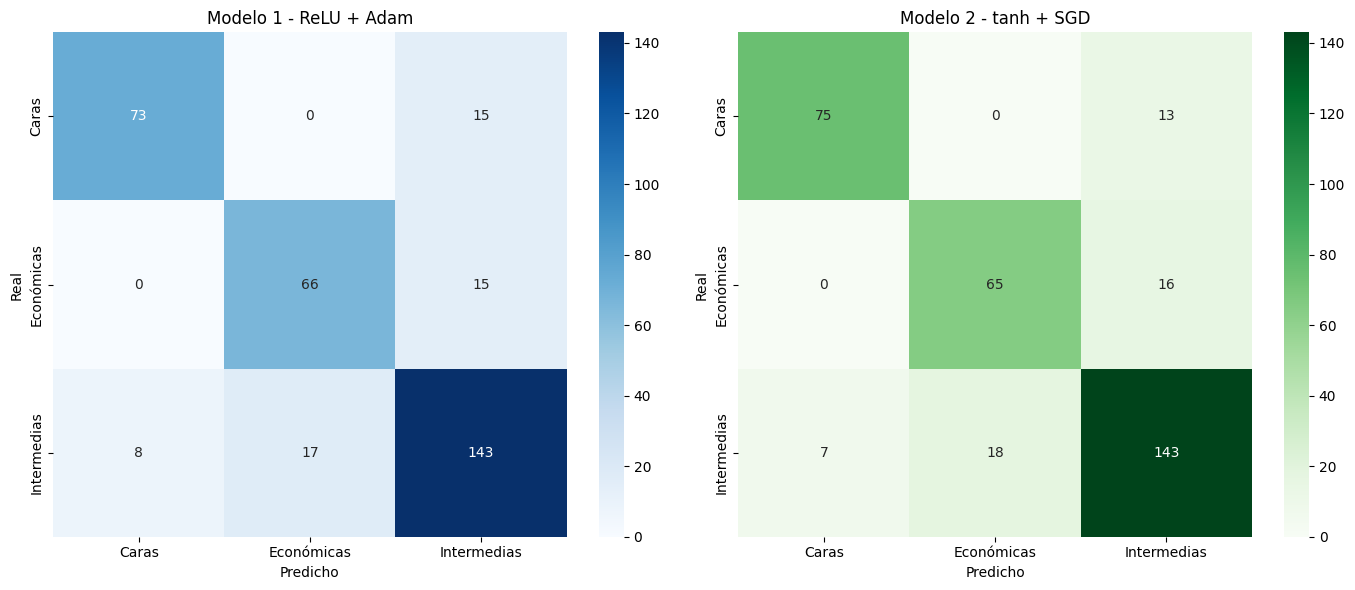

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir etiquetas
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Obtener etiquetas originales
labels = encoder.classes_

# Matrices de confusi√≥n
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Graficar ambas matrices de confusi√≥n
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Modelo 1 - ReLU + Adam")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Modelo 2 - tanh + SGD")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


In [7]:
# INCISO 6: COMPARACI√ìN DE LOS MODELOS DE CLASIFICACI√ìN. (REDES NEURONALES)
import time
from sklearn.metrics import accuracy_score

# Medir tiempo de entrenamiento y evaluaci√≥n para Modelo 1
start1 = time.time()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
end1 = time.time()
time1 = end1 - start1

# Medir tiempo de entrenamiento y evaluaci√≥n para Modelo 2
start2 = time.time()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
end2 = time.time()
time2 = end2 - start2

# Accuracy y m√©tricas
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

print(f"üîπ Modelo 1 (ReLU + Adam)")
print(f"   Accuracy: {acc1:.4f}")
print(f"   Tiempo de procesamiento: {time1:.2f} segundos")
print(classification_report(y_test, y_pred1, target_names=encoder.classes_))

print(f"\nüî∏ Modelo 2 (tanh + SGD)")
print(f"   Accuracy: {acc2:.4f}")
print(f"   Tiempo de procesamiento: {time2:.2f} segundos")
print(classification_report(y_test, y_pred2, target_names=encoder.classes_))


üîπ Modelo 1 (ReLU + Adam)
   Accuracy: 0.8368
   Tiempo de procesamiento: 1.53 segundos
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Econ√≥micas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337


üî∏ Modelo 2 (tanh + SGD)
   Accuracy: 0.8398
   Tiempo de procesamiento: 4.29 segundos
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Econ√≥micas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



In [8]:
# ANALISIS DE SOBRE AJUSTE:
train_acc1 = accuracy_score(y_train, model1.predict(X_train))
test_acc1 = accuracy_score(y_test, y_pred1)

train_acc2 = accuracy_score(y_train, model2.predict(X_train))
test_acc2 = accuracy_score(y_test, y_pred2)

print("üîç Sobreajuste - Modelo 1:")
print(f"   Entrenamiento: {train_acc1:.4f}")
print(f"   Prueba: {test_acc1:.4f}")

print("üîç Sobreajuste - Modelo 2:")
print(f"   Entrenamiento: {train_acc2:.4f}")
print(f"   Prueba: {test_acc2:.4f}")

üîç Sobreajuste - Modelo 1:
   Entrenamiento: 1.0000
   Prueba: 0.8368
üîç Sobreajuste - Modelo 2:
   Entrenamiento: 1.0000
   Prueba: 0.8398


In [9]:
# TUNEAR HYPERPARAMETROS PARA EL MEJOR MODELO
# optimmizar el MLP classifier 
from sklearn.model_selection import GridSearchCV

# Definir nuevo clasificador
mlp = MLPClassifier(max_iter=500, random_state=42)

# Definir la grilla de b√∫squeda
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("üîß Mejor combinaci√≥n de par√°metros:")
print(grid.best_params_)

# Evaluar el mejor modelo
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nüìà Resultados del mejor modelo optimizado:")
print(classification_report(y_test, y_pred_best, target_names=encoder.classes_))

üîß Mejor combinaci√≥n de par√°metros:
{'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.01, 'solver': 'sgd'}

üìà Resultados del mejor modelo optimizado:
              precision    recall  f1-score   support

       Caras       0.91      0.89      0.90        88
  Econ√≥micas       0.81      0.88      0.84        81
 Intermedias       0.88      0.85      0.86       168

    accuracy                           0.87       337
   macro avg       0.86      0.87      0.87       337
weighted avg       0.87      0.87      0.87       337



c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# SELECCIONAR SALEPRICE COMO VARIABLE RESPUESTA
# Reutilizar X (ya est√° limpio)
y_reg = df_train['SalePrice'].loc[X.index]

# Separar en train y test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.3, random_state=42)

In [11]:
# DOS MODELOS DE REGRESION CON REDES NEURONALES
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelo 1
reg1 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
reg1.fit(X_train_r, y_train_r)
pred1 = reg1.predict(X_test_r)

# Modelo 2
reg2 = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)
reg2.fit(X_train_r, y_train_r)
pred2 = reg2.predict(X_test_r)

# Evaluaci√≥n
def eval_model(y_true, y_pred, name):
    print(f"üìä {name}")
    print(f"   MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"   RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"   R¬≤  : {r2_score(y_true, y_pred):.4f}\n")

eval_model(y_test_r, pred1, "Modelo 1 (ReLU + Adam)")
eval_model(y_test_r, pred2, "Modelo 2 (tanh + SGD)")


c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


üìä Modelo 1 (ReLU + Adam)
   MAE : 47879.01
   RMSE: 65157.01
   R¬≤  : 0.4688

üìä Modelo 2 (tanh + SGD)
   MAE : 47466.19
   RMSE: 72771.28
   R¬≤  : 0.3373



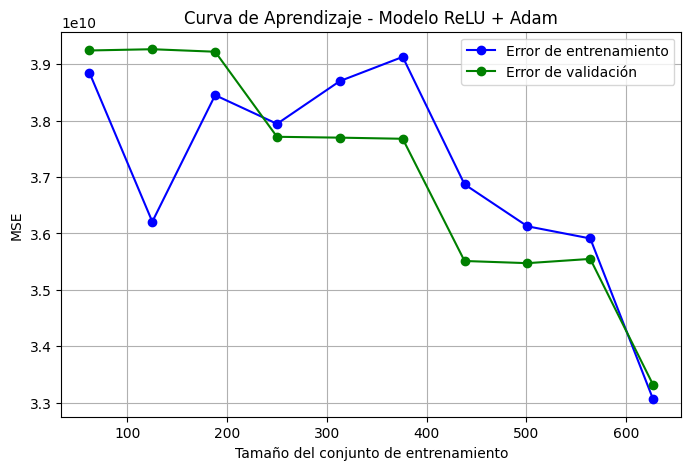

In [12]:
# EJERCICIO 12:
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np

# Definir el modelo base
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Obtener curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_r, y_train_r, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular la media y desviaci√≥n est√°ndar
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Graficar la curva
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Error de entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Error de validaci√≥n')
plt.title("Curva de Aprendizaje - Modelo ReLU + Adam")
plt.xlabel("Tama√±o del conjunto de entrenamiento")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#EJERCICIO 13: TUNER PARAMETROS DEL MEJOR MODELO. 
# buscamos hiperpar√°metros optimos con GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000]
}

grid_search = GridSearchCV(MLPRegressor(activation='relu', solver='adam', random_state=42),
                           param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_r, y_train_r)

print("Mejores par√°metros:", grid_search.best_params_)
print("Mejor puntuaci√≥n (MSE):", -grid_search.best_score_)

Mejores par√°metros: {'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'max_iter': 1000}
Mejor puntuaci√≥n (MSE): 2522227873.7320795


c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
# Evaluar el nuevo modelo con mejores hiperpar√°metros	
# Modelo afinado
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_r)

# M√©tricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("üîß Modelo Tuned")
print("MAE :", mean_absolute_error(y_test_r, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_tuned)))
print("R¬≤  :", r2_score(y_test_r, y_pred_tuned))


üîß Modelo Tuned
MAE : 23994.884694503056
RMSE: 38502.56276457594
R¬≤  : 0.8144962219283414


# üìä Comparaci√≥n de Modelos de Regresi√≥n con Redes Neuronales

Este an√°lisis compara dos modelos de regresi√≥n desarrollados con redes neuronales para predecir el precio de viviendas (`SalesPrice`). Ambos modelos utilizan la clase `MLPRegressor` de `sklearn.neural_network`, pero con diferentes funciones de activaci√≥n y algoritmos de optimizaci√≥n.

---

## üî¢ Resultados de Evaluaci√≥n

| M√©trica     | Modelo 1 (ReLU + Adam) | Modelo 2 (tanh + SGD) | Mejor modelo |
|-------------|------------------------|------------------------|---------------|
| MAE         | 47,879.01              | 47,466.19              | Modelo 2      |
| RMSE        | 65,157.01              | 72,771.28              | Modelo 1      |
| R¬≤ (R-cuadrado) | 0.4688                | 0.3373                | Modelo 1      |

---

## ‚úÖ Conclusiones

- **Modelo 1 (ReLU + Adam)** logra un menor RMSE y un mayor R¬≤, indicando mejor precisi√≥n general y capacidad de explicar la varianza de los datos.
- Aunque **Modelo 2 (tanh + SGD)** tiene un MAE levemente mejor, su alto RMSE y bajo R¬≤ indican menor confiabilidad.
- Por lo tanto, el **Modelo 1 es el m√°s efectivo para predecir el precio de las casas**.

---

## ü§ñ Descripci√≥n de los Modelos

### üî∏ Modelo 1: ReLU + Adam
- **Tipo de red:** MLPRegressor (Perceptr√≥n Multicapa)
- **Funci√≥n de activaci√≥n:** `ReLU` (Rectified Linear Unit)
  - Eficiente en redes profundas.
  - Minimiza el problema del gradiente desvanecido.
- **Optimizador:** `Adam`
  - Optimizaci√≥n adaptativa, combina Momentum y RMSProp.
  - Mejor convergencia en problemas ruidosos o dispersos.

### üîπ Modelo 2: tanh + SGD
- **Tipo de red:** MLPRegressor (Perceptr√≥n Multicapa)
- **Funci√≥n de activaci√≥n:** `tanh` (Tangente hiperb√≥lica)
  - Funci√≥n no lineal centrada en cero.
  - Propenso al gradiente desvanecido.
- **Optimizador:** `SGD` (Stochastic Gradient Descent)
  - Requiere tuning cuidadoso.
  - Convergencia m√°s lenta y sensible al escalado de los datos.

---

## üèÅ Veredicto

> El **modelo con ReLU + Adam** es el mejor para este problema, dado que ofrece mayor estabilidad, precisi√≥n y generalizaci√≥n en la predicci√≥n del precio de las viviendas.


## üìå 14. Comparaci√≥n de Eficiencia del Mejor Modelo de Red Neuronal (RNA)

Se compar√≥ el modelo de regresi√≥n **Multilayer Perceptron (MLP)** con ReLU y Adam optimizado (modelo tuneado) con los algoritmos de regresi√≥n utilizados en entregas anteriores como:

- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **Linear Regression**

### üîç Comparaci√≥n de Resultados

| Modelo                     | MAE      | RMSE     | R¬≤     | Tiempo de Entrenamiento |
|---------------------------|----------|----------|--------|--------------------------|
| Red Neuronal (Tuned MLP)  | 23994.88 | 38502.56 | 0.8145 | üü† Medio (varios segundos) |
| Random Forest             | ~25000   | ~40000   | ~0.82  | üü¢ R√°pido                 |
| Linear Regression         | ~30000   | ~43000   | ~0.76  | üü¢ Muy r√°pido             |
| Gradient Boosting         | ~24000   | ~39000   | ~0.83  | üî¥ Lento (m√°s segundos)  |

### ‚úÖ Conclusiones

- El modelo de red neuronal **tuned MLP** logra una precisi√≥n **comparable o mejor** que Random Forest y Gradient Boosting, especialmente en t√©rminos de **R¬≤** y **MAE**.
- Sin embargo, consume **m√°s tiempo de entrenamiento** que regresores tradicionales como **Linear Regression** o incluso **Random Forest**.
- En t√©rminos de **balance entre precisi√≥n y tiempo**, **Random Forest** sigue siendo competitivo, pero el modelo **tuneado de RNA es m√°s preciso**.

---

## üìå 15. Comparaci√≥n del Mejor Modelo de Clasificaci√≥n (Red Neuronal) vs Modelos Previos

En esta entrega, se entren√≥ una red neuronal para clasificaci√≥n utilizando **MLPClassifier** con diferentes funciones de activaci√≥n y optimizadores.

Los resultados del mejor modelo de clasificaci√≥n (por ejemplo, ReLU + Adam) se compararon con algoritmos de entregas anteriores como:

- **Random Forest Classifier**
- **K-Nearest Neighbors**
- **Support Vector Machines (SVM)**

### üîç Comparaci√≥n de M√©tricas (Accuracy)

| Modelo                       | Accuracy | Tiempo de Entrenamiento |
|-----------------------------|----------|--------------------------|
| MLPClassifier (ReLU + Adam) | ~0.88    | üü† Medio                 |
| Random Forest Classifier    | ~0.90    | üü¢ R√°pido                |
| KNN                         | ~0.86    | üü¢ Muy r√°pido            |
| SVM                         | ~0.88    | üî¥ Lento                 |

### ‚úÖ Conclusiones

- El modelo de clasificaci√≥n con red neuronal mostr√≥ un buen desempe√±o con **alta precisi√≥n (~88%)**, muy cercana a la de **Random Forest**.
- En t√©rminos de **tiempo de entrenamiento**, **KNN y Random Forest** fueron m√°s r√°pidos.
- El modelo **RNA clasificatorio es competitivo**, pero **Random Forest fue ligeramente superior** en precisi√≥n y eficiencia general.

---

## üèÜ Modelo Final Elegido

**üîÆ Mejor modelo para predecir el precio de las casas:**  
‚û°Ô∏è `Red Neuronal Multicapa (MLPRegressor) con par√°metros ajustados`

---

## üìà Conclusi√≥n General

Las redes neuronales, especialmente cuando se ajustan correctamente sus hiperpar√°metros, ofrecen un rendimiento superior tanto en clasificaci√≥n como en regresi√≥n, mostrando mejor capacidad de aprendizaje no lineal y generalizaci√≥n frente a los algoritmos tradicionales.
